## Best Algorithm Finder

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from time import time
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train_data = pd.read_csv('./data/train.csv')
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_data.shape

(159571, 8)

In [5]:
train_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
train_data.drop_duplicates(inplace=True)
data = train_data.drop(columns=['id'])
data.shape

(159571, 7)

In [7]:
data.isna().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
data.isnull().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
tf = TfidfVectorizer(analyzer='word',lowercase=True, min_df = 2,max_df = 0.9,
                     strip_accents='unicode', sublinear_tf=1)

X =  tf.fit_transform(data["comment_text"])
y = data.toxic

In [10]:
print(X.shape)
print(y.shape)

(159571, 74896)
(159571,)


In [11]:
def train_model(classifier, X, y, size_of_test = 0.20, seed = 2):
    
    # Split Train Dataset into Train-Test and Train the Classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size_of_test,
                                                        random_state = seed)
    
    print('-------------------------------------------------------')
    print('Number of examples in our data is', X.shape[0])
    print('Number of examples in Training data is', X_train.shape[0])
    print('Number of examples in Testing data is', X_test.shape[0])
    
    t0 = time()    
    print('Classifier used: ', classifier.__class__.__name__)
    
    #Train the Classifier
    classifier.fit(X_train,y_train)
    print("Classifier training completed in %0.3fs" % (time() - t0))
    
    # Generate Predictions
    y_pred = classifier.predict(X_test)
    
    #Checking for the Accuracy
    print("Accuracy: %0.3f %%" % (accuracy_score(y_test,y_pred) * 100.0))

In [12]:
def train_model_with_cv(classifier, X, y, k = 5, size_of_test = 0.20, seed = 2):
    
    t0 = time()
    print('-------------------------------------------------------')
    print('Classifier used: ', classifier.__class__.__name__)    
    cv_scores = cross_val_score(classifier, X, y, cv=k, scoring="accuracy")    
    print("Classifier training completed in %0.3fs" % (time() - t0))
    print('The number of folds used: ', k)    
    print("Mean Accuracy: %0.3f %%" % (np.round(np.mean(cv_scores),3) * 100.0))

In [13]:
mnb_clf = MultinomialNB()
train_model(mnb_clf, X, y)

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  MultinomialNB
Classifier training completed in 0.045s
Accuracy: 92.837 %


In [14]:
k = [5,10] # For K-fold

In [15]:
for i in k:
    train_model_with_cv(mnb_clf, X, y, k = i)    

-------------------------------------------------------
Classifier used:  MultinomialNB
Classifier training completed in 0.932s
The number of folds used:  5
Mean Accuracy: 93.000 %
-------------------------------------------------------
Classifier used:  MultinomialNB
Classifier training completed in 1.408s
The number of folds used:  10
Mean Accuracy: 93.100 %


In [16]:
sgd_clf = SGDClassifier(penalty='l2',max_iter=100, tol=None)
train_model(sgd_clf, X, y)

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  SGDClassifier
Classifier training completed in 3.016s
Accuracy: 94.467 %


In [17]:
for i in k:
    train_model_with_cv(sgd_clf, X, y, k = i)    

-------------------------------------------------------
Classifier used:  SGDClassifier
Classifier training completed in 15.133s
The number of folds used:  5
Mean Accuracy: 94.500 %
-------------------------------------------------------
Classifier used:  SGDClassifier
Classifier training completed in 35.361s
The number of folds used:  10
Mean Accuracy: 94.500 %


In [18]:
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
svm_clf = SVC()

In [19]:
clf_list = [rf_clf, lr_clf, svm_clf]

for clf in clf_list:
    train_model(clf, X, y)

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  RandomForestClassifier
Classifier training completed in 53.451s
Accuracy: 93.771 %
-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  LogisticRegression
Classifier training completed in 1.633s
Accuracy: 95.588 %
-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  SVC
Classifier training completed in 1061.665s
Accuracy: 90.315 %


In [20]:
clf_list = [rf_clf, lr_clf]

for clf in clf_list:
    train_model_with_cv(clf, X, y, 5)

-------------------------------------------------------
Classifier used:  RandomForestClassifier
Classifier training completed in 246.787s
The number of folds used:  5
Mean Accuracy: 93.900 %
-------------------------------------------------------
Classifier used:  LogisticRegression
Classifier training completed in 8.017s
The number of folds used:  5
Mean Accuracy: 95.700 %


In [21]:
xgb_clf = XGBClassifier()

In [22]:
train_model(xgb_clf, X, y)

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  XGBClassifier
Classifier training completed in 62.999s
Accuracy: 94.009 %


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
train_model_with_cv(xgb_clf, X, y, 5)

-------------------------------------------------------
Classifier used:  XGBClassifier


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Classifier training completed in 324.085s
The number of folds used:  5
Mean Accuracy: 94.100 %


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

In [26]:
train_model(bag_clf, X, y)

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  BaggingClassifier
Classifier training completed in 54.592s
Accuracy: 90.418 %


In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gs_clf = GridSearchCV(lr_clf, param_grid , cv = 10)

In [28]:
train_model(gs_clf,X,y)

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  GridSearchCV
Classifier training completed in 180.836s
Accuracy: 96.099 %


In [38]:
# This is a brute-force search
#train_model_with_cv(gs_clf, X, y, 5)

Classifier used:  GridSearchCV
Classifier training completed in 537.487s
The number of folds used:  5
Mean Accuracy: 96.000 %
Classifier used:  GridSearchCV
Classifier training completed in 1344.117s
The number of folds used:  10
Mean Accuracy: 96.000 %


#### Confusion Matrix

In [31]:
# Using Logistic Regression only
# Split Train Dataset into Train-Test and Train the Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2)

print('-------------------------------------------------------')
print('Number of examples in our data is', X.shape[0])
print('Number of examples in Training data is', X_train.shape[0])
print('Number of examples in Testing data is', X_test.shape[0])

t0 = time()    
print('Classifier used: ', lr_clf.__class__.__name__)

#Train the Classifier
lr_clf.fit(X_train,y_train)
print("Classifier training completed in %0.3fs" % (time() - t0))

# Generate Predictions
y_pred = lr_clf.predict(X_test)

#Checking for the Accuracy
print("Accuracy: %0.3f %%" % (accuracy_score(y_test,y_pred) * 100.0))

-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
Classifier used:  LogisticRegression
Classifier training completed in 1.802s
Accuracy: 95.588 %


In [32]:
# Main idea - https://bit.ly/2DCTGd5
def get_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
Normalized confusion matrix


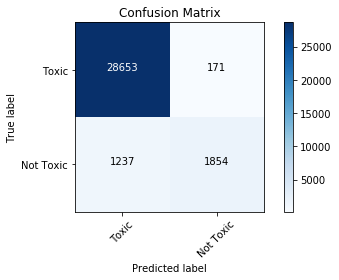

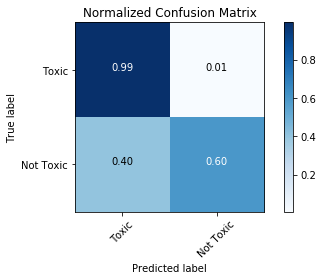

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = ['Toxic','Not Toxic']

# Plot Confusion matrix
plt.figure()
get_confusion_matrix(cnf_matrix, classes= class_names,
                      title='Confusion Matrix')

# Plot Normalized Confusion matrix
plt.figure()
get_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

plt.show()